In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Step 1: Import pandas
import pandas as pd



# Step 3: File path
file_path = '/content/drive/MyDrive/Colab Notebooks/Cleaned&Preprocessed_data.csv'

# Step 4: Read the CSV
df = pd.read_csv(file_path)

# Step 5: Display full columns (so Colab doesn’t hide wide tables)
pd.set_option('display.max_columns', None)

# Step 6: Show the first few rows
df.head()


,Unnamed: 0,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity End Date,First Name,Date of Birth,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date,Age,Opportunity_Duration_days,Signup_Month,Signup_Year,Engagement_Duration_days,Age_norm,Engagement_Duration_norm,Age_x_OpportunityDuration,Engagement_Score,Signup_Season,Gender_Female,Gender_Male,Gender_Other,Country_Algeria,Country_American Samoa,Country_Australia,Country_Azerbaijan,Country_Bangladesh,Country_Belarus,Country_Bhutan,Country_Botswana,Country_Brazil,Country_British Indian Ocean Territory,Country_Cameroon,Country_Canada,Country_China,Country_Congo,Country_Dominican Republic,Country_Egypt,Country_Ethiopia,Country_Falkland Islands (Malvinas),Country_France,Country_Gambia,Country_Germany,Country_Ghana,Country_Honduras,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Ivory Coast,Country_Japan,Country_Kazakhstan,Country_Kenya,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Malaysia,Country_Mauritius,Country_Morocco,Country_Namibia,Country_Nepal,Country_Nigeria,Country_Pakistan,Country_Peru,Country_Philippines,Country_Qatar,Country_Rwanda,Country_Saudi Arabia,Country_Sierra Leone,Country_Singapore,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Tanzania,Country_Tunisia,Country_Turkey,Country_U.S. Virgin Islands,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uzbekistan,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Opportunity Category_Course,Opportunity Category_Engagement,Opportunity Category_Event,Opportunity Category_Internship
0,0,2023-06-14 12:30:35.000,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,2024-06-29 18:52:39,Faria,2001-12-01,Nwihs,Radiology,2024-11-03 12:01:41,Started,1080.0,2023-06-14 12:36:09,2022-03-11 18:30:39,23,841,6,2023,459,0.326923,0.656888,19343,1323,Summer,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,2023-01-05 05:29:16.000,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,2024-06-29 18:52:39,Poojitha,2000-08-16,Saint Louis,Information Systems,2024-11-03 12:01:41,Started,1080.0,2023-01-05 06:08:21,2022-03-11 18:30:39,24,841,1,2023,299,0.346154,0.554847,20184,1164,Winter,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,2023-09-04 20:35:08.000,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,2024-06-29 18:52:39,Emmanuel,2002-01-27,Illinois Institute Of Technology,Computer Science,2024-11-03 12:01:41,Started,1080.0,2023-11-05 00:21:29,2022-03-11 18:30:39,23,841,9,2023,603,0.326923,0.748724,19343,1467,Fall,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,3,2023-08-29 05:20:03.000,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,2024-06-29 18:52:39,Amrutha Varshini,1999-01-11,Saint Louis University,Information Systems,2024-11-03 12:01:41,Team Allocated,1070.0,2023-09-10 22:02:42,2022-03-11 18:30:39,26,841,8,2023,548,0.384615,0.713648,21866,1415,Summer,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,4,2023-06-01 15:26:36.000,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,2024-06-29 18:52:39,Vinay Varshith,2000-04-19,Saint Louis University,Computer Science,2024-11-03 12:01:41,Started,1080.0,2023-06-01 15:40:10,2022-03-11 18:30:39,25,841,6,2023,446,0.365385,0.648597,21025,1312,Summer,0,1,0,0,0,0,0,0,0,0,0,

Total Learners in Top 10 Countries: 8285
Country_United States: 3976 learners
Country_India: 2836 learners
Country_Nigeria: 760 learners
Country_Ghana: 275 learners
Country_Pakistan: 219 learners
Country_Bangladesh: 65 learners
Country_Egypt: 50 learners
Country_Kenya: 38 learners
Country_Ethiopia: 38 learners
Country_Rwanda: 28 learners


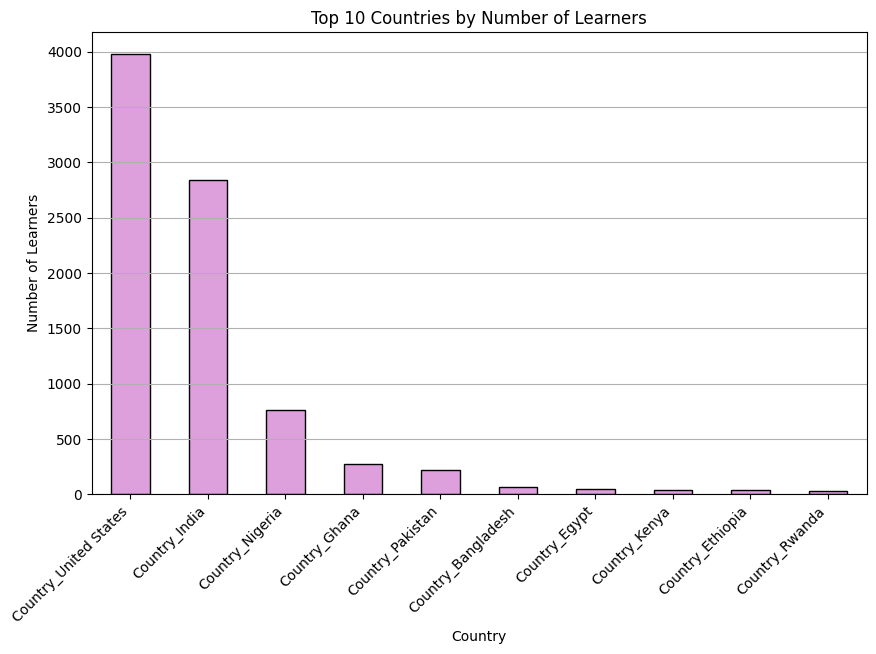

In [7]:
# Step 11: Bar Chart - Top 10 Countries by Number of Learners
import matplotlib.pyplot as plt

# Step 11.1: Select country columns only
country_columns = [col for col in df.columns if col.startswith('Country_')]

# Step 11.2: Sum the number of learners per country
country_counts = df[country_columns].sum().sort_values(ascending=False)

# Step 11.3: Take Top 10 countries
top_countries = country_counts.head(10)

# Step 11.4: Print total learners and total by each country
total_learners = top_countries.sum()
print(f"Total Learners in Top 10 Countries: {total_learners}")
for country, count in top_countries.items():
    print(f"{country}: {count} learners")

# Step 11.5: Plot the bar chart
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='plum', edgecolor='black')
plt.title('Top 10 Countries by Number of Learners')
plt.xlabel('Country')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()



In [9]:
# Step 14: Calculate learners in countries outside the top 10
other_countries_count = country_counts.tail(len(country_counts) - 10).sum()
print(f"Total learners in other countries: {other_countries_count}")



Total learners in other countries: 272


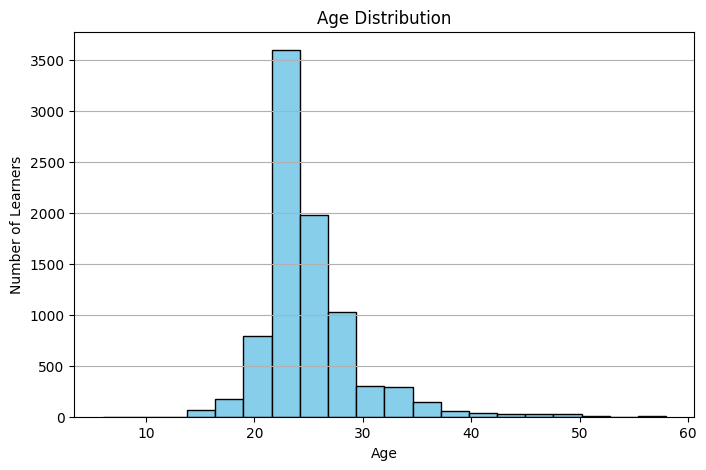

Total data points used for Age Distribution: 8558


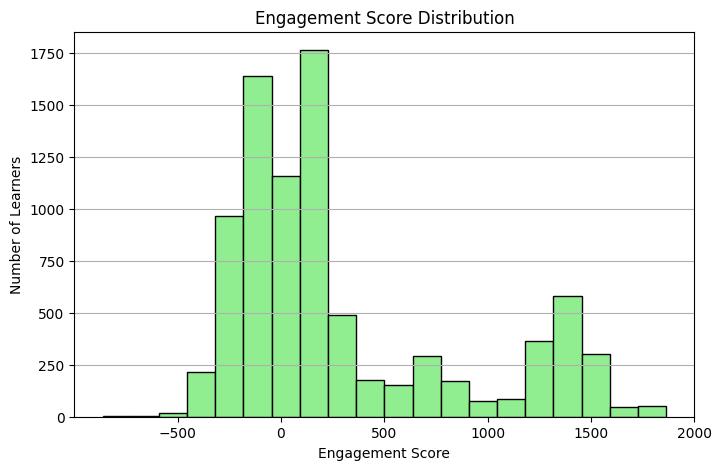

Total data points used for Engagement Score Distribution: 8558


In [13]:
import matplotlib.pyplot as plt

# Step 1: Plot Age Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
plt.show()

# Print number of data points used
print(f"Total data points used for Age Distribution: {df['Age'].dropna().shape[0]}")

# Step 2: Plot Engagement Score Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Engagement_Score'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Engagement Score Distribution')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
plt.show()

# Print number of data points used
print(f"Total data points used for Engagement Score Distribution: {df['Engagement_Score'].dropna().shape[0]}")





Total Age datapoints: 8558


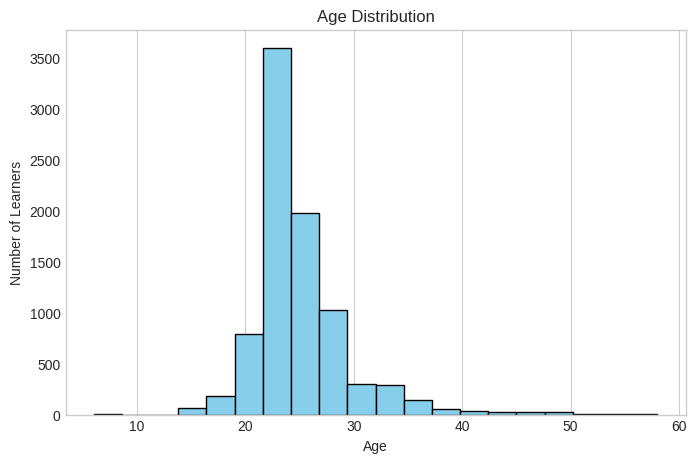

Total Engagement Score datapoints: 8558


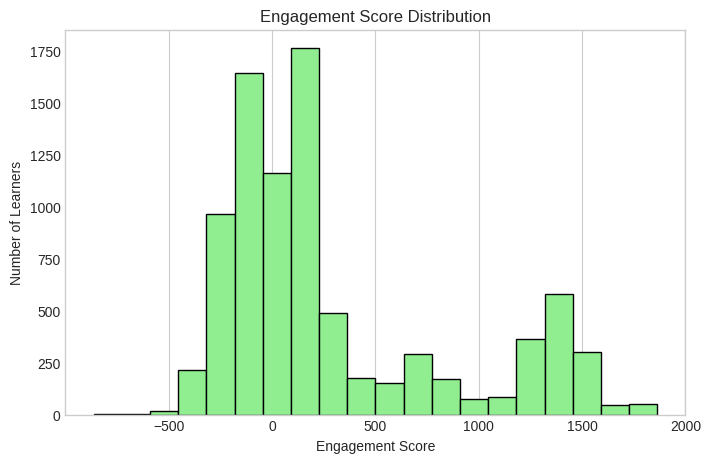

Total Signup Month datapoints: 8558


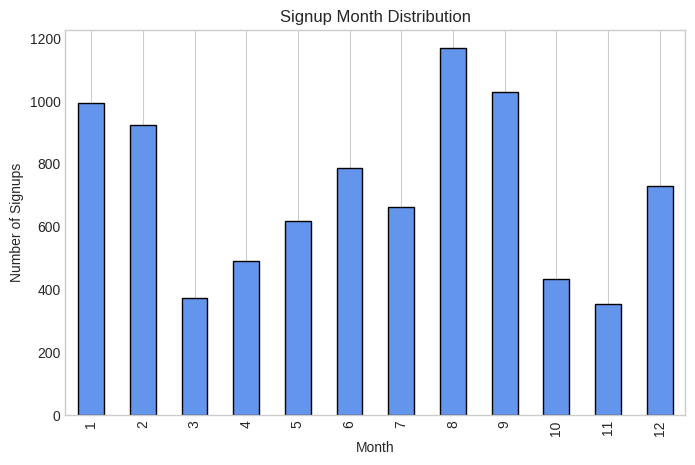

Total Signup Season datapoints: 8558


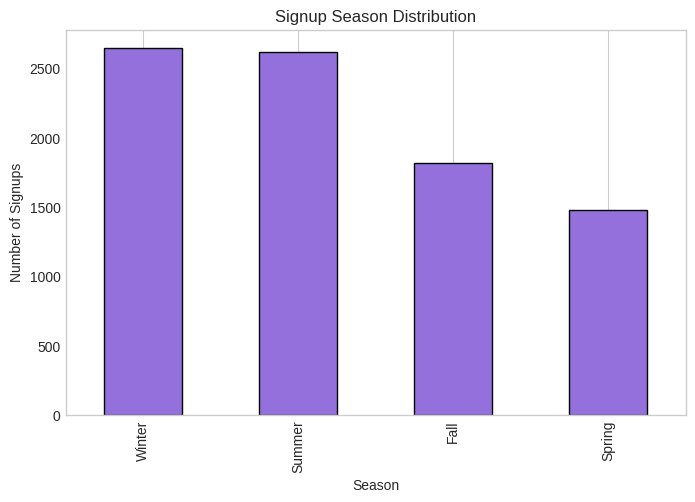

Total Gender datapoints: 8543


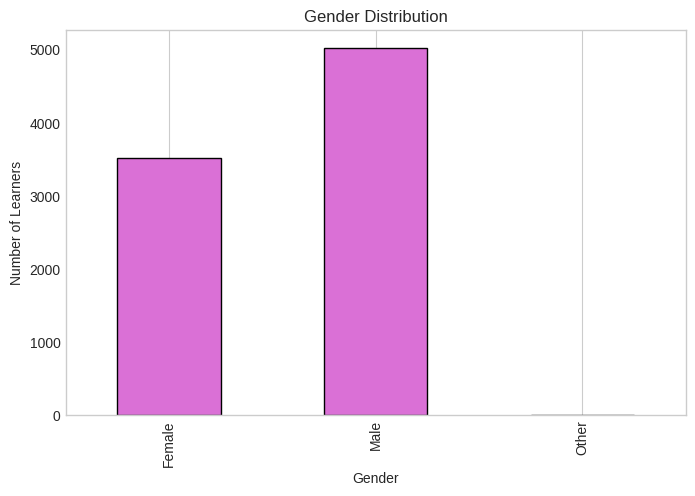

Total Status datapoints: 8558


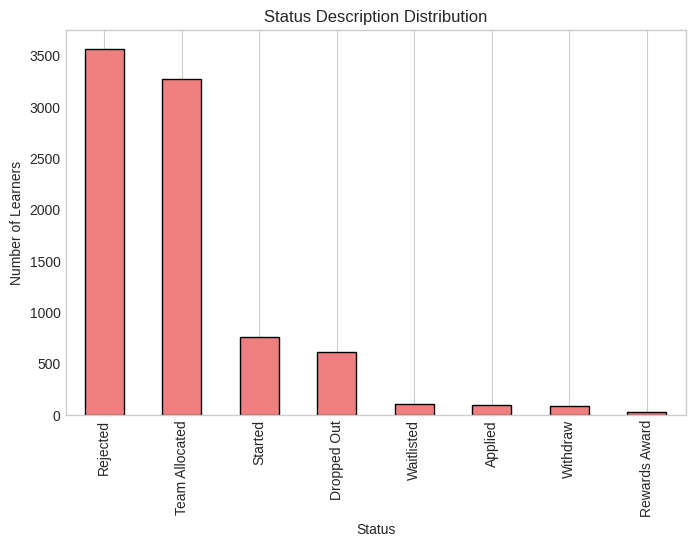

Total Majors datapoints: 8553


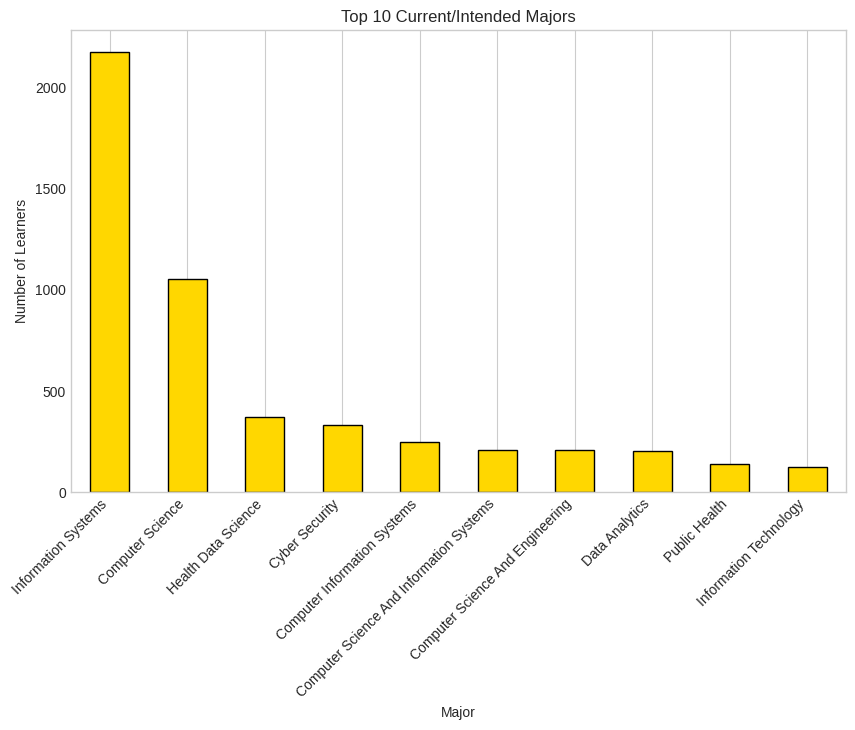

Total Country datapoints: 8557


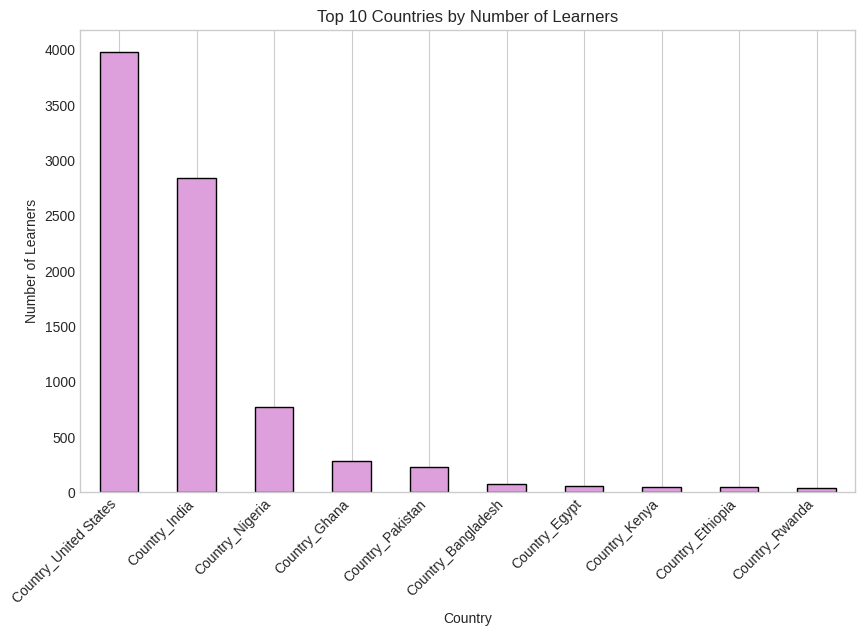

In [14]:

import matplotlib.pyplot as plt

# Set figure style globally
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Age Distribution (already done, but repeating for flow)
plt.figure(figsize=(8,5))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
print(f"Total Age datapoints: {df['Age'].dropna().shape[0]}")
plt.show()

# 2. Engagement Score Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Engagement_Score'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Engagement Score Distribution')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
print(f"Total Engagement Score datapoints: {df['Engagement_Score'].dropna().shape[0]}")
plt.show()

# 3. Signup Month Distribution
plt.figure(figsize=(8,5))
df['Signup_Month'].dropna().value_counts().sort_index().plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Signup Month Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(axis='y')
print(f"Total Signup Month datapoints: {df['Signup_Month'].dropna().shape[0]}")
plt.show()

# 4. Signup Season Distribution
plt.figure(figsize=(8,5))
df['Signup_Season'].dropna().value_counts().plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Signup Season Distribution')
plt.xlabel('Season')
plt.ylabel('Number of Signups')
plt.grid(axis='y')
print(f"Total Signup Season datapoints: {df['Signup_Season'].dropna().shape[0]}")
plt.show()

# 5. Gender Distribution
plt.figure(figsize=(8,5))
gender_cols = ['Gender_Female', 'Gender_Male', 'Gender_Other']
gender_counts = df[gender_cols].sum()
gender_counts.index = ['Female', 'Male', 'Other']  # prettier names
gender_counts.plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
print(f"Total Gender datapoints: {gender_counts.sum()}")
plt.show()

# 6. Status Description Distribution
plt.figure(figsize=(8,5))
df['Status Description'].dropna().value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Status Description Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
print(f"Total Status datapoints: {df['Status Description'].dropna().shape[0]}")
plt.show()

# 7. Current/Intended Major Distribution (Top 10 Majors)
plt.figure(figsize=(10,6))
df['Current/Intended Major'].dropna().value_counts().head(10).plot(kind='bar', color='gold', edgecolor='black')
plt.title('Top 10 Current/Intended Majors')
plt.xlabel('Major')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
print(f"Total Majors datapoints: {df['Current/Intended Major'].dropna().shape[0]}")
plt.show()

# 8. Country Distribution (Top 10)
country_columns = [col for col in df.columns if col.startswith('Country_')]
country_counts = df[country_columns].sum().sort_values(ascending=False)
top_countries = country_counts.head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='plum', edgecolor='black')
plt.title('Top 10 Countries by Number of Learners')
plt.xlabel('Country')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
print(f"Total Country datapoints: {country_counts.sum()}")
plt.show()


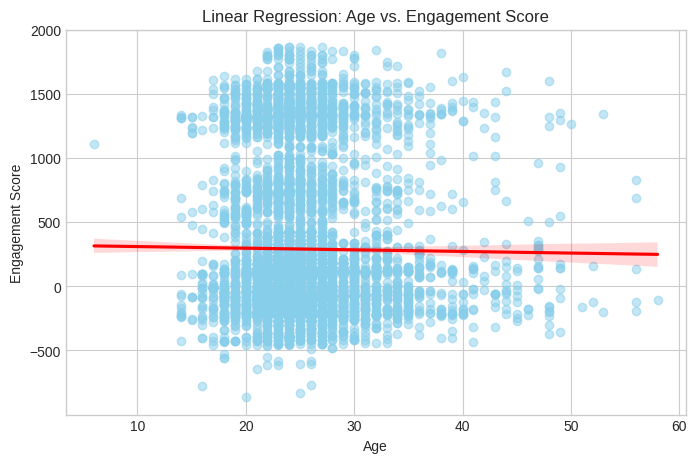

R-squared value: 0.0001


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Scatter plot with linear regression line between Age and Engagement Score
plt.figure(figsize=(8,5))
sns.regplot(x='Age', y='Engagement_Score', data=df, scatter_kws={'alpha':0.5, 'color':'skyblue'}, line_kws={'color':'red'})
plt.title('Linear Regression: Age vs. Engagement Score')
plt.xlabel('Age')
plt.ylabel('Engagement Score')
plt.grid(True)
plt.show()

# Calculate R-squared value
X = df['Age']
y = df['Engagement_Score']
X = sm.add_constant(X)  # Adds the intercept to the model

# Fit the model
model = sm.OLS(y, X).fit()

# Print the R-squared value
print(f"R-squared value: {model.rsquared:.4f}")




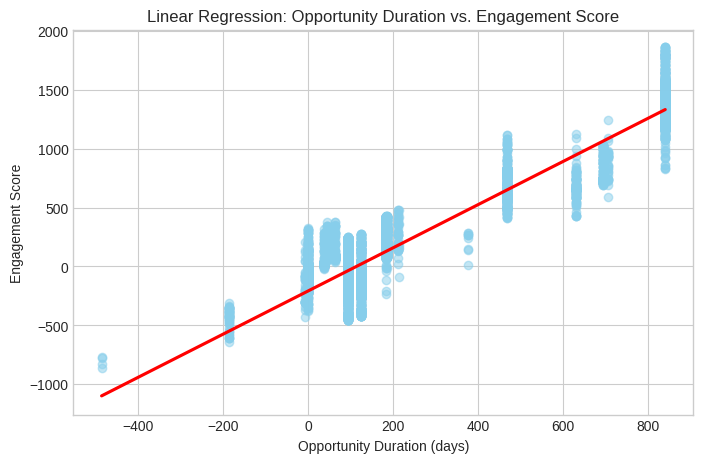

R-squared value for Opportunity Duration vs Engagement Score: 0.9138


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Linear regression model
model = LinearRegression()

# Scatter plot with linear regression line between Opportunity Duration and Engagement Score
plt.figure(figsize=(8,5))
sns.regplot(x='Opportunity_Duration_days', y='Engagement_Score', data=df, scatter_kws={'alpha':0.5, 'color':'skyblue'}, line_kws={'color':'red'})
plt.title('Linear Regression: Opportunity Duration vs. Engagement Score')
plt.xlabel('Opportunity Duration (days)')
plt.ylabel('Engagement Score')
plt.grid(True)
plt.show()

# Calculate R-squared value for Opportunity Duration vs Engagement Score
X = df['Opportunity_Duration_days'].dropna().values.reshape(-1, 1)
y = df['Engagement_Score'].dropna().values
model.fit(X, y)
r_squared_opportunity = model.score(X, y)

print(f"R-squared value for Opportunity Duration vs Engagement Score: {r_squared_opportunity:.4f}")



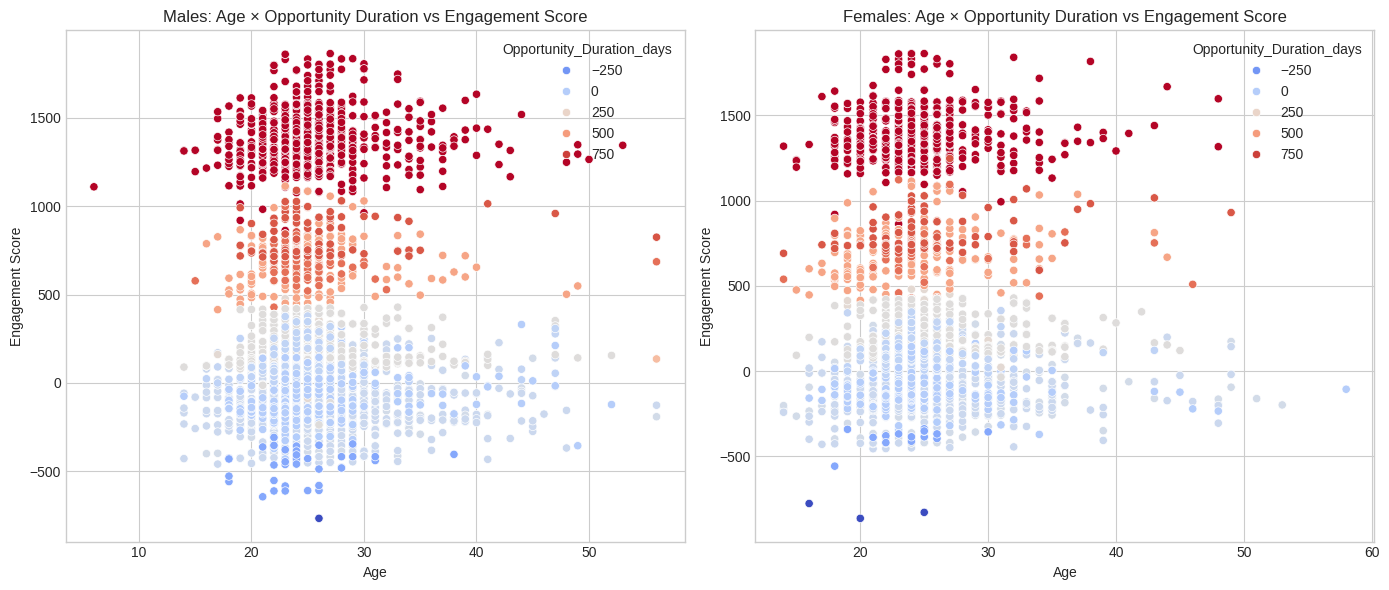

R² for Males (Age × Opportunity Duration vs Engagement Score): 0.9129
R² for Females (Age × Opportunity Duration vs Engagement Score): 0.9145


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df is your dataframe
# Focus on relevant columns: Age, Gender, Opportunity Duration, and Engagement Score
df = df[['Age', 'Gender_Female', 'Gender_Male', 'Opportunity_Duration_days', 'Engagement_Score']]

# 1. Separate the data for males and females
df_male = df[df['Gender_Male'] == 1]
df_female = df[df['Gender_Female'] == 1]

# 2. Scatter Plot for Males
plt.figure(figsize=(14, 6))

# Plot for Males
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_male, x='Age', y='Engagement_Score', hue='Opportunity_Duration_days', palette='coolwarm')
plt.title('Males: Age × Opportunity Duration vs Engagement Score')
plt.xlabel('Age')
plt.ylabel('Engagement Score')

# 3. Scatter Plot for Females
# Plot for Females
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_female, x='Age', y='Engagement_Score', hue='Opportunity_Duration_days', palette='coolwarm')
plt.title('Females: Age × Opportunity Duration vs Engagement Score')
plt.xlabel('Age')
plt.ylabel('Engagement Score')

plt.tight_layout()
plt.show()

# 4. Linear Regression Model for Males
X_male = df_male[['Age', 'Opportunity_Duration_days']]
y_male = df_male['Engagement_Score']
model_male = LinearRegression()
model_male.fit(X_male, y_male)
y_pred_male = model_male.predict(X_male)
r2_male = r2_score(y_male, y_pred_male)

# 5. Linear Regression Model for Females
X_female = df_female[['Age', 'Opportunity_Duration_days']]
y_female = df_female['Engagement_Score']
model_female = LinearRegression()
model_female.fit(X_female, y_female)
y_pred_female = model_female.predict(X_female)
r2_female = r2_score(y_female, y_pred_female)

# Print R² values
print(f'R² for Males (Age × Opportunity Duration vs Engagement Score): {r2_male:.4f}')
print(f'R² for Females (Age × Opportunity Duration vs Engagement Score): {r2_female:.4f}')


